## 차원축소

차원의 저주 : 차원이 낮았을 때는 발생하지 않았던 문제가 **차원이 커지면서** 발생하는 것
차원이 커지면, 관측할 변수가 많아지고 차원이 구성하는 공간의 크기가 커지면서 공간 안의 데이터들 간의 거리가 멀어지고, 그 결과 데이터가 희박해진다.

차원이 증가하면, 동일한 수준의 통계적 유의성을 가지기 위해 훨씬 더 많은 데이터를 요구한다.

#### 차원의 저주를 해결하는 방법
1 . 데이터를 충분히 늘리는 것
데이터의 수가 차원의 수보다 작아지는 시점에 문제가 생기며, 데이터를 설명하는 모형을 찾을 수 없다.
2 . Bow로 표현한 문서의 특성의 수를 줄여 차원 축소를 하는 것
특성 선택으로 현재 있는 특성들 중에서 대표 특성을 선택한다.
문서에 너무 많이 나타나거나 너무 적은 경우 제외한다.
3 . 특성 추출
기존의 특성 값을 조합해 새로운 특성을 생성한다.

### 1. PCA(주성분 분석)를 이용한 차원 축소

데이터의 분산을 최대한 보존하는 새로운 축을 찾아 변환함으로써 차원을 축소하고자 하는 방법

**가장 중요한 원칙**
정보 손실을 방지해야 한다. → 이런 정보량은 분산으로 측정할 수 있다. (차원이 줄어들 때, 분산을 크게 유지해야 한다.)
점들이 넓게 분포하면, 점이 겹쳐질 확률도 줄고 각 점 사이의 거리도 멀어져 점을 더 잘 분별할 수 있다.|

In [6]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

X_train = newsgroups_train.data
y_train = newsgroups_train.target

X_test = newsgroups_test.data
y_test = newsgroups_test.target

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

RegTok = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english'))

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    # portr stemmer 적용
    features = (list(map(lambda token: PorterStemmer().stem(token),words)))
    return features

tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

C:\Users\ahyeo\anaconda3\envs\TextMining\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [8]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test)))

#Train set score: 0.962
#Test set score: 0.761


In [9]:
X_train_tfidf.shape

(2034, 20085)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000, random_state= 7) # 20085차원을 2000차원으로 축소
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

print('Original tfidf matrix shape : ', X_train_tfidf.shape)
print('PCA Converted matrix shape : ', X_train_pca.shape)
print(
    "Sum of explained variance ratio : {:.3f}".format(
        pca.explained_variance_ratio_.sum() # 설명되는 분산 : 100%로, 정보 손실이 발생하지 않음
    )
)

Original tfidf matrix shape :  (2034, 20085)
PCA Converted matrix shape :  (2034, 2000)
Sum of explained variance ratio : 1.000


In [12]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test))) # 성능 동일

#Train set score: 0.962
#Test set score: 0.761


In [16]:
lasso_clf = LogisticRegression(penalty  ='l1', solver  = "liblinear", C = 1)
lasso_clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))

import numpy as np
print("#Used features count : {}". format(np.sum(lasso_clf.coef_ != 0 )),
    'out of',
      X_train_tfidf.shape[1])

#Train set score: 0.790
#Test set score: 0.718
#Used features count : 321 out of 20085


In [18]:
pca = PCA(n_components=321, random_state= 7)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape : ', X_train_pca.shape)
print("Sum of explained Variance ratio : {:.3f}".format(
    pca.explained_variance_ratio_.sum()
))

PCA Converted X shape :  (2034, 321)
Sum of explained Variance ratio : 0.437


In [19]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

#Train set score: 0.875
#Test set score: 0.751


In [20]:
## 차원을 100개로 줄였을 경우
pca = PCA(n_components=100, random_state= 7)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape : ', X_train_pca.shape)
print("Sum of explained Variance ratio : {:.3f}".format(
    pca.explained_variance_ratio_.sum()
))

PCA Converted X shape :  (2034, 100)
Sum of explained Variance ratio : 0.211


In [21]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

#Train set score: 0.807
#Test set score: 0.738


#### 2. LSA를 이용한 차원 축소 및 의미파악

LSA = 잠재 의미 분석
문서들에 잠재된 의미를 분석하고 동시에 단어에 잠재된 의미도 분석한다.

SVD = 특잇값 분해

LSA에서의 차원 축소는 SVD 변형인 **절단된 SVD**에서 이루어진다.

축소된 차원은 잠재적 의미를 나타내고, 문서와 단어를 연결한다.
즉, 문서 벡터가 m개의 차원일 때에는 사용된 단어의 빈도에 기반해 문서를 표현하지만, k개의 차원으로 축소한 후에는 k개의 잠재된 의미를 비중으로 각 문서를 표현한다.
→ k개의 차원은 각각 잠재된 의미를 표현하며 단어 또한 k개의 잠재된 의미의 비중으로 표현되어 있다.


**주의사항**
사이킷런에서 자연어처리를 할 때에는 PCA보다 TruncatedSVD를 사용하는 것이 더 일반적이다.

In [31]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2000, random_state=7)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print("LSA Converted X shape : ", X_train_lsa.shape)
print(
    "Sum of exlained variance ratio : {:.3f}".format(
        svd.explained_variance_ratio_.sum()
    )
)

LR_clf.fit(X_train_lsa, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_lsa, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_lsa, y_test)))

LSA Converted X shape :  (2034, 2000)
Sum of exlained variance ratio : 1.000
#Train set score: 0.962
#Test set score: 0.761


In [32]:
svd = TruncatedSVD(n_components=100, random_state=1) #압축할 component의 수 지정
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_lsa, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_lsa, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_lsa, y_test)))

LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209
#Train set score: 0.810
#Test set score: 0.745


In [33]:
### LSA를 이용한 의미 기반 문서 간 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity

print('#사용된 전체 카테고리:', newsgroups_train.target_names)
print('#첫 문서의 카테고리:', y_train[0])

#변환된 count vector와 기존 값들과의 similarity 계산
sim_result = cosine_similarity([X_train_lsa[0]], X_train_lsa)

print("#Top 20 유사도(lsa):\n", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print('#Top 20 유사 뉴스의 인덱스(lsa):\n', sim_index) # 유사도 최댓값 : 0.74
sim_labels = [y_train[i] for i in sim_index]
print('#Top 20 유사 뉴스의 카테고리(lsa):\n', sim_labels)

#사용된 전체 카테고리: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
#첫 문서의 카테고리: 1
#Top 20 유사도(lsa):
 [1.0, 0.74, 0.74, 0.72, 0.7, 0.7, 0.69, 0.67, 0.66, 0.65, 0.65, 0.65, 0.63, 0.62, 0.62, 0.62, 0.57, 0.57, 0.55, 0.54]
#Top 20 유사 뉴스의 인덱스(lsa):
 [   0 1957 1674  501 1995 1490  790 1902 1575 1209 1728  892 1892  998
 1038 1826 1290 1089  867  151]
#Top 20 유사 뉴스의 카테고리(lsa):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [34]:
#TFIDF에서의 유사도
sim_result = cosine_similarity(X_train_tfidf[0], X_train_tfidf)

print("#Top 20 유사도(lsa) : \n", sorted(sim_result[0].round(2), reverse =True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print("#Top 20 유사 뉴스의 인덱스(lsa) : \n", sim_index) # 유사도 최댓값 : 0.3
sim_labels = [y_train[i] for i in sim_index]
print("#Top 20 유사 뉴스의 카테고리(lsa) : \n", sim_labels)

#Top 20 유사도(lsa) : 
 [1.0, 0.3, 0.22, 0.21, 0.19, 0.19, 0.19, 0.17, 0.16, 0.16, 0.16, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.14]
#Top 20 유사 뉴스의 인덱스(lsa) : 
 [   0 1575 1892 1490  501 1290 1013  998 1636 1705 1995 1957 1664  651
 1038  429 1089 1209 1728 1803]
#Top 20 유사 뉴스의 카테고리(lsa) : 
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### 잠재적인 토픽 분석

문서들이 잠재된 의미의 비중으로 표현되고 다시 그 잠재된 의미가 단어들과 연관되어 있다면,
**잠재적 의미와 연결된 단어들을 살펴봄**으로써, 문서를 이루고 있는 잠재적 의미가 무엇인지 파악할 수 있다.
이 때, 잠재된 의미를 **토픽**이라고 하고, 이러한 분석을 **토픽 모델링**이라고 한다.

걱 단어의 의미 파악 : TruncatedSVD의 components 속성

In [37]:
svd = TruncatedSVD(n_components = 10, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape : ', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

terms = tfidf.get_feature_names_out()
def get_topics(model, feature_names, n = 10): # 10개의 정보 추출
    for idx, topic in enumerate(model.components_):
        print("Topic %d : "%(idx + 1), # 주제 당 단어
              [feature_names[i] for i in topic.argsort()[:-n-1:-1]])

get_topics(svd, terms)

LSA Converted X shape :  (2034, 10)
Sum of explained variance ratio: 0.045
Topic 1 :  ['would', 'one', 'god', 'think', 'use', 'peopl', 'know', 'like', 'say', 'space']
Topic 2 :  ['file', 'imag', 'thank', 'program', 'graphic', 'space', 'format', 'use', 'color', 'ftp']
Topic 3 :  ['space', 'orbit', 'nasa', 'launch', 'shuttl', 'satellit', 'year', 'moon', 'lunar', 'cost']
Topic 4 :  ['moral', 'object', 'system', 'valu', 'goal', 'think', 'anim', 'absolut', 'natur', 'defin']
Topic 5 :  ['ico', 'bobb', 'tek', 'beauchain', 'bronx', 'manhattan', 'sank', 'queen', 'vice', 'blew']
Topic 6 :  ['god', 'file', 'imag', 'object', 'moral', 'exist', 'space', 'format', 'system', 'color']
Topic 7 :  ['file', 'islam', 'imag', 'cview', 'use', 'format', 'color', 'muslim', 'religion', 'peopl']
Topic 8 :  ['post', 'file', 'space', 'islam', 'read', 'cview', 'format', 'articl', 'group', 'moral']
Topic 9 :  ['christian', 'graphic', 'imag', 'jesu', 'book', 'data', 'group', 'softwar', 'law', 'code']
Topic 10 :  ['ex

#### 단어 간 유사도 분석

문서 간에 나타나는 빈도 분포에 따라 단어 간의 의미적인 유사도를 구할 수 있다.

예를 들어, svd.components_ shape이 (100, 1000) 일 때, 이를 전처행렬로 구하면 모양이 (1000, 100)이 된다.
→ 이 의미는 **1000개의 단어에 대해 100개의 내재된 의미**를 이용해 유사도를 구한다.

In [39]:
tfidf = TfidfVectorizer(max_features=1000, min_df = 5, max_df = 0.5)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

svd = TruncatedSVD(n_components=100, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)

print("#Components_의 shape : ", svd.components_.shape)
print("#singular_values의 shape : ", svd.singular_values_.shape) # 잠재 의미
t_words = np.diag(svd.singular_values_).dot(svd.components_).T # 전치 행렬
print("#변환된 단어-잠재의미 행렬의 shape : ", t_words.shape)

#t_words에서 space(topic)에 해당하는 벡터를 가져온다.
source = t_words[np.where(tfidf.get_feature_names_out() == 'space')[0][0]]
sim_result = cosine_similarity([source], t_words)

print("#Top 20 유사도(lsa) : \n", sorted(sim_result[0].round(2), reverse =True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print("#Top 20 유사 뉴스의 인덱스(tfidf) : \n", sim_index)
sim_labels = [tfidf.get_feature_names_out()[i] for i in sim_index]
print("#Top 20 유사 뉴스의 카테고리(tfidf) : \n", sim_labels)

#Components_의 shape :  (100, 1000)
#singular_values의 shape :  (100,)
#변환된 단어-잠재의미 행렬의 shape :  (1000, 100)
#Top 20 유사도(lsa) : 
 [1.0, 0.73, 0.72, 0.69, 0.66, 0.58, 0.56, 0.56, 0.54, 0.54, 0.52, 0.52, 0.52, 0.51, 0.51, 0.5, 0.5, 0.49, 0.48, 0.47]
#Top 20 유사 뉴스의 인덱스(tfidf) : 
 [812 314 754 829 594 679 720 650 785 565 101 435 606 545 854 746 669 856
 611 564]
#Top 20 유사 뉴스의 카테고리(tfidf) : 
 ['space', 'exploration', 'sci', 'station', 'office', 'propulsion', 'reports', 'planetary', 'shuttle', 'national', 'astro', 'international', 'operations', 'missions', 'technical', 'satellites', 'probes', 'telescope', 'orbiter', 'nasa']


#### tSNE를 이용한 시각화와 차원축소 효과

tSNE는 비지도학습 알고리즘으로, 다차원 데이터 사이의 거리를 가장 잘 보존하는 2차원 좌표를 착기 위해 사용된다.
즉, 2차원 공간으로 데이터 간의 거리를 매핑함으로써 시각적으로 이를 쉽게 파악할 수 있도록 해준다.

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

In [45]:
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

tsne = TSNE(n_components=2)
tsne_tfidf = tsne.fit_transform(X_train_tfidf)
print('TSNE dimension:', tsne_tfidf.shape)

TypeError: PCA initialization is currently not supported with the sparse input matrix. Use init="random" instead.

In [46]:
def tsne_graph(tsne_2, label, lim=None):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}
    x = tsne_2[:,0] #압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] #압축된 둘째 차원은 y축으로 이용
    plt.figure(figsize=(15,10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    #for i in range(500):
    for i in range(len(x)):
        #각 값에 대해 y값 즉 label에 따라 색을 바꿔가며 text로 그래프에 출력
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]): # 제한을 둔 거리 사이에 있으면, 표기
            plt.text(x[i], y[i], label[i], color = colors[label[i]])
    plt.show()

In [47]:
tsne_graph(tsne_tfidf, y_train, (-4, 5, -5, 5))

NameError: name 'tsne_tfidf' is not defined

LSA Converted X shape :  (2034, 100)
Sum of explained variance ratio: 0.209
TSNE Dimension :  (2034, 2)
#Selected categories :  ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


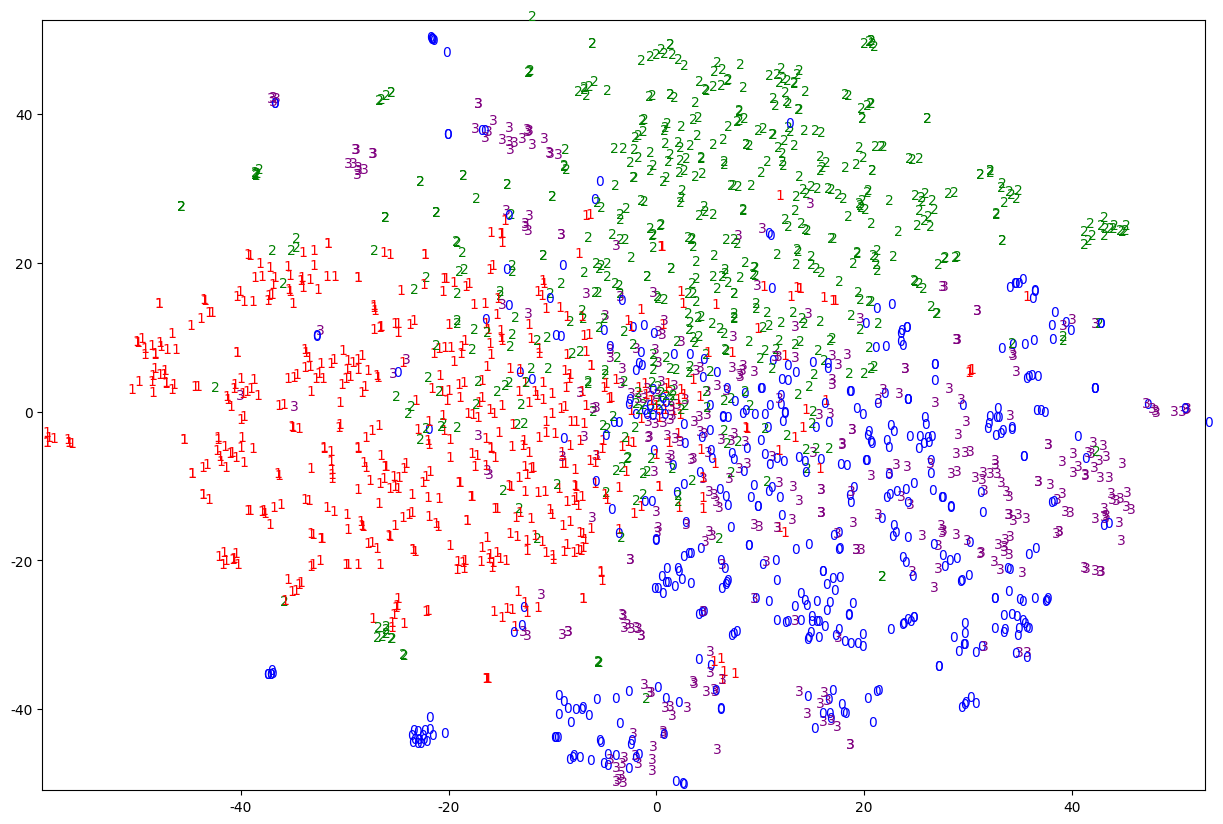

In [48]:
svd = TruncatedSVD(n_components=100, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape : ', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

tsne_lsa = tsne.fit_transform(X_train_lsa)
print("TSNE Dimension : ", tsne_lsa.shape)

print("#Selected categories : ", newsgroups_train.target_names)

tsne_graph(tsne_lsa, y_train)

## 토픽 모델링

텍스트 마이닝 기법 중, 가장 많이 활용되는 기법 중 하나로, **다양한 문서 집합에 내재한 토픽, 주제를 파악할 때** 쓰는 방법이다.
문서 분류가 텍스트의 내용을 파악해서 무엇인가 예측하는 것에 목적을 두었다면, **토픽 모델링은 예측보다는 내용의 분석 자체를 목적으로 하는 기법**이다.

즉, 주어진 텍스트에 대해 사후적으로 분석하는 기법이다.

사용하는 알고리즘 : LDA(Latent Dirichlet Allocation)

<br>

#### 토픽 모델링이란?

문서에 어떠한 내용이 있었는지 **구체적**으로 알고 싶다면, 단어의 빈도를 세는 것으로는 부족하다.
토픽 모델링은 주제별 사용된 단어를 구체적으로 보여준다.

즉, 내제된 주제의 분석을 가능하게 하는 기법이며 주제들이 시간에 따라 어떻게 변화했는지 살펴보는 **토픽 트렌드** 분석이다.

#### LDA 모형의 구조

LDA는 토픽 모델링에서 가장 널리 쓰이고 있는 기본적인 알고리즘이다.
각 문서에 내제된 주제 혹은 토픽이며, 이러한 내제된 주제를 유추하고자 하는 통계적 방법론이다.

**구조**

1 . 토픽 모델링은 전체 문서에 공통적으로 내재한 토픽들을 식별한다.
각 문서가 개별적으로 전혀 다른 토픽들로 구성되는 것이 아니고, 전체 말뭉치를 관통하는 **공통적인** 토픽들이 있으며, 이들이 다양한 비중으로 결합된 것이다.
문서에 따른 토픽의 확률분포를 추정하는 것이 첫 번째 목표이다.

한 개의 문서에는 여러 개의 토픽이 존재하고, 그 토픽은 확률값을 가진다.
우리의 문서의 토픽 분포는 디리클레 분포를 따른다.

2 . 각 토픽의 단어 분포를 알아낸다. 토픽은 그 토픽을 구성하는 단어의 비중으로 표현한다.
문서의 토픽 분포와 각 토픽의 단어의 분포가 결합됨으로써 문서의 단어 분포가 결정된다.

즉, 어떤 문서에 사용된 단어의 분포(각 단어의 빈도)는 이 문서에 잠재된 토픽에 의해 결정되는데, 각 토픽은 단어의 분포이므로, 이것들이 결합되어 문서에 사용된 단어의 분포가 된다.

**결론**

각 문서에 사용된 단어들의 빈도를 측정하고, 이로부터 역으로 모든 문서의 토픽분포와 각 토픽의 단어 분포를 추정한다.

**성능에 대한 척도**
혼란도, 토픽 응집도

혼란도(perplexity) : 특정한 확률 모형이 실제로 관측되는 값을 얼마나 유사하게 예측하는지 평가할 때 사용한다. / 확률 모형이 주어진 문서 집합을 얼마나 유사하게 생성하는가
토픽 응집도(topic coherence) : 각 토픽에서 상위 비중을 차지하는 단어들이 의미적으로 유사한지 나타내는 척도

통계적 검증보다는, 최적값 근처의 여러 모형을 가지고 사람이 직접 비교하는 것이 좋다.

**사용 패키지**
사이킷런(혼란도만 제공), Gensim(더 많이 사용)

In [1]:
## 데이터 준비
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space',
              'comp.sys.ibm.pc.hardware', 'sci.crypt']

#학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Selected categories:', newsgroups_train.target_names)

#Train set size: 3219
#Selected categories: ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [2]:
## 카운트 벡터 생성
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', max_features=2000, min_df = 5, max_df = 0.5) #특성의 개수를 제한하지 않는 것이 성능이 좋으나, 오래 걸림
review_cv = cv.fit_transform(newsgroups_train.data)

#### 사이킷런 LDA를 이용한 토픽 모델링

#### 사이킷런의 LDA 매개변수
n_components : topic의 개수 (가장 중요한 hyper parameter)
max_iter : 최대 반복 횟수 (default : 10)
topic_word_prior : 토픽의 사전 단어분포를 결정하는 매개변수 (beta)
doc_topic_prior : 문서의 사전 토픽 분포 (alpha)
learning_method : batch, online 중 택 1
n_jobs : 사용하는 프로세서 수 (-1이면, 모든 프로세서 활용)

In [4]:
##pg 162
from sklearn.decomposition import LatentDirichletAllocation # LDA 사용
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components = 10, #전체 토픽의 수
                                max_iter = 5, #반복 횟수 (최소 5는 주어야함.)
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method = 'online',
                                n_jobs= -1,  #모든 프로세서 수 사용
                                random_state = 0)

review_topics = lda.fit_transform(review_cv)
print("#shape of review_topics :", review_topics.shape) #(문서의 수, 토픽의 수)
print("#sample of review_topics :", review_topics[0]) #첫번째 문서에서 토픽의 비중 -> 첫번째 토픽의 비중이 큼

gross_topic_weights = np.mean(review_topics, axis = 0)
print("Sum of topic weights of documents : ", gross_topic_weights) # 10번째 토픽이 corpus 전체에서 14.8%로 가장 많이 나타남

print("Shape of topic word distribution : ", lda.components_.shape) # 각 토픽에 대해 카운트 벡터에서 사용한 단어 2,000개의 비중

#shape of review_topics : (3219, 10)
#sample of review_topics : [0.902 0.007 0.028 0.008 0.007 0.008 0.008 0.007 0.007 0.017]
Sum of topic weights of documents :  [0.087 0.083 0.086 0.114 0.116 0.131 0.092 0.072 0.071 0.148]
Shape of topic word distribution :  (10, 2000)


In [5]:
## 토픽의 내용을 파악하기 위해 가장 비중이 높은 단어 10 ~ 20개를 확인
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end = '')
        print(
            ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]) # 가장 비중이 높은 단어를 뒤에서 추출
        )

    print()
print_top_words(lda, cv.get_feature_names_out(), 10) #각 주제별 상위 10개 단어 추출

Topic #0: com, morality, article, sgi, keith, sandvik, objective, think, moral, don't
Topic #1: image, graphics, file, files, ftp, available, software, data, use, pub
Topic #2: space, nasa, access, launch, earth, orbit, shuttle, digex, lunar, satellite
Topic #3: article, just, com, don't, like, nntp, host, posting, i'm, university
Topic #4: key, clipper, chip, encryption, com, government, law, keys, use, escrow
Topic #5: scsi, com, bit, ibm, thanks, know, bus, university, posting, nntp
Topic #6: gov, nasa, host, nntp, university, posting, distribution, ___, center, world
Topic #7: drive, com, disk, hard, controller, drives, dos, tape, floppy, problem
Topic #8: key, public, faq, message, mail, pgp, group, des, uni, sci
Topic #9: god, people, don't, jesus, just, believe, does, say, think, know



토픽 모델링을 수행한 결과에 대해 분석가가 판단을 수행한다.
통계적 검증인 토픽 응집도나 혼란도와 같은 수치에 전적으로 의존하지 말고, **사람의 판단**이 중요하다.

n_components : 6, perplexity : 1061.456
n_components : 7, perplexity : 1063.705
n_components : 8, perplexity : 1010.231
n_components : 9, perplexity : 1022.315
n_components : 10, perplexity : 1026.688
n_components : 11, perplexity : 1038.270
n_components : 12, perplexity : 1032.219
n_components : 13, perplexity : 1036.676
n_components : 14, perplexity : 1038.562
n_components : 15, perplexity : 1044.049


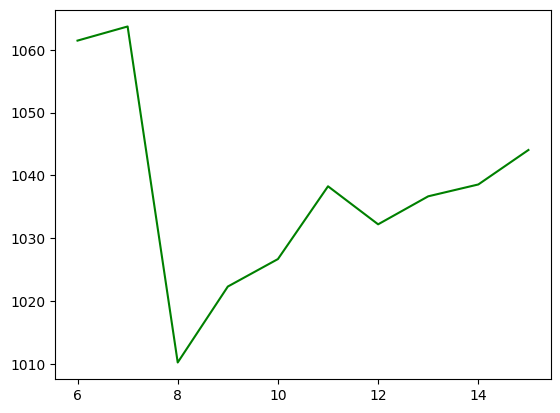

n_components with minimum perplexity :  8


In [7]:
## 최적의 토픽 수 판단하기
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start = 10, end = 30, max_iter = 5, topic_word_prioir = 0.1,
                    doc_topic_prioir = 1.0) :
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i,
                                max_iter = max_iter,
                                topic_word_prior= topic_word_prioir, doc_topic_prior= doc_topic_prioir,
                                learning_method = 'batch',
                                n_jobs= -1,
                                random_state = 7)
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components : {i}, perplexity : {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value)) # 가장 최솟값 반환


print("n_components with minimum perplexity : ",
      show_perplexity(review_cv, start = 6, end = 15))


위의 결과를 보면, 토픽의 수가 8일 때 다른 값에 비해 perplexity가 낮은 것을 볼 수 있다.

In [8]:
lda = LatentDirichletAllocation(n_components=8, #혼란도가 낮은 8을 topic의 수로 지정
                                max_iter = 20,
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs = -1,
                                random_state = 7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: image, graphics, file, available, mail, ftp, data, information, files, software
Topic #1: posting, nntp, host, com, university, gov, article, distribution, reply, ___
Topic #2: com, keith, morality, article, think, caltech, sgi, don't, objective, moral
Topic #3: com, jesus, article, know, just, don't, god, i'm, good, people
Topic #4: people, god, does, don't, think, say, believe, just, way, like
Topic #5: drive, scsi, card, com, disk, ide, controller, hard, bus, use
Topic #6: space, nasa, access, launch, moon, year, earth, digex, orbit, shuttle
Topic #7: key, encryption, clipper, chip, com, government, keys, use, security, public



#### GENSIM을 이용한 토픽 모델링

Gensim은 word2vector로 잘 알려져 있으며, 토픽 모델링을 비롯해 의미적인 자연어 처리를 위한 다양한 라이브러리를 제공한다.

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords = stopwords.words('english')

RegTok = RegexpTokenizer("[\w']{3,}")
english_stops = stopwords.words('english')

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

texts = [tokenizer(news) for news in newsgroups_train.data]

[Gensim 사용 방법]

사이킷런의 countvectorizer와 같은 기능을 하는 토큰화 결과를 doc2bow 메서드로 카운트벡터로 변환한다.
**Gensim은 내부 모듈에서 매개변수를 사용할 때, 텍스트의 토큰화 결과를 공통적으로 texts로 지칭한다.**
doc2bow 메서드로 변환한 결과는 corpus로 지칭한다.

In [11]:
# dictionary 생성, 필터링, 카운트 벡터 변환
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(texts) #토큰화 결과를 dictionary로 반환
print("#Number of initial unique words in documents : ", len(dictionary))

#문서 빈도수가 너무 적거나 높은 단어 필터링 및 특성을 단어의 빈도 수로 선택
#특성 추출 : 2000개, 단어는 적어도 5개 이상, 50% 이하 출현
dictionary.filter_extremes(keep_n = 2000, no_below = 5, no_above=0.5)
print("#Number of unique words after removing rare and common words : ", len(dictionary))

#카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print("#Number of unique tokens : %d" %len(dictionary))
print("#Number of documents : %d" %len(corpus))

#Number of initial unique words in documents :  46466
#Number of unique words after removing rare and common words :  2000
#Number of unique tokens : 2000
#Number of documents : 3219


In [15]:
from gensim.models import LdaModel

num_topics = 10 #topic의 수
passes = 5 #반복 횟수
%time model = LdaModel(corpus = corpus, id2word = dictionary,\
                        passes = passes, num_topics= num_topics,\
                        random_state = 7)

CPU times: total: 8.61 s
Wall time: 13.6 s


In [16]:
# 각 토픽의 상위 비중
model.print_topics(num_words = 10) #토픽의 번호와 함께 토픽의 상위 비중 출력

[(0,
  '0.023*"com" + 0.018*"keith" + 0.016*"caltech" + 0.013*"sgi" + 0.013*"nntp" + 0.013*"posting" + 0.013*"host" + 0.012*"would" + 0.012*"system" + 0.011*"livesey"'),
 (1,
  '0.020*"morality" + 0.018*"objective" + 0.015*"one" + 0.015*"say" + 0.014*"uiuc" + 0.012*"frank" + 0.012*"values" + 0.010*"faq" + 0.010*"article" + 0.008*"cso"'),
 (2,
  '0.026*"com" + 0.025*"access" + 0.025*"posting" + 0.023*"host" + 0.023*"nntp" + 0.017*"digex" + 0.015*"article" + 0.013*"cwru" + 0.013*"___" + 0.013*"net"'),
 (3,
  '0.021*"university" + 0.017*"posting" + 0.015*"host" + 0.015*"nntp" + 0.013*"article" + 0.010*"com" + 0.009*"know" + 0.009*"i\'m" + 0.009*"would" + 0.009*"thanks"'),
 (4,
  '0.032*"com" + 0.015*"would" + 0.011*"article" + 0.010*"one" + 0.010*"get" + 0.009*"people" + 0.009*"ibm" + 0.008*"government" + 0.007*"good" + 0.007*"i\'m"'),
 (5,
  '0.025*"key" + 0.017*"encryption" + 0.014*"clipper" + 0.014*"chip" + 0.009*"keys" + 0.009*"use" + 0.008*"security" + 0.008*"government" + 0.008*"pub

In [17]:
#minimum_probability 이상의 토픽 출력
print("#topic distribution of the first document : ", model.get_document_topics(corpus)[0])

#topic distribution of the first document :  [(0, 0.7257732), (8, 0.2699467)]


In [25]:
#gensim 모델링 시각화
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(dictionary, corpus) #오류남 !!!!!
lda_viz

TypeError: prepare() missing 1 required positional argument: 'dictionary'

In [26]:
### 혼란도 및 토픽 응집도를 이용한 최적값 선택
## 토픽 응집도
#u_mass : model, corpus 필요 (속도가 빠름)
#c_v, c_uci, cnpmi : model, texts 필요
from gensim.models import CoherenceModel

cm = CoherenceModel(model = model, corpus = corpus, coherence = "u_mass")
coherence = cm.get_coherence()
print(coherence)

-1.7493528544065975


num_topics = 6, perplexity = -7.035, coherence = -1.701
num_topics = 7, perplexity = -7.023, coherence = -1.735
num_topics = 8, perplexity = -7.023, coherence = -1.547
num_topics = 9, perplexity = -7.007, coherence = -1.891
num_topics = 10, perplexity = -6.996, coherence = -1.888
num_topics = 11, perplexity = -7.027, coherence = -2.164
num_topics = 12, perplexity = -7.019, coherence = -2.018
num_topics = 13, perplexity = -7.025, coherence = -2.255
num_topics = 14, perplexity = -7.020, coherence = -2.082
num_topics = 15, perplexity = -7.019, coherence = -2.521


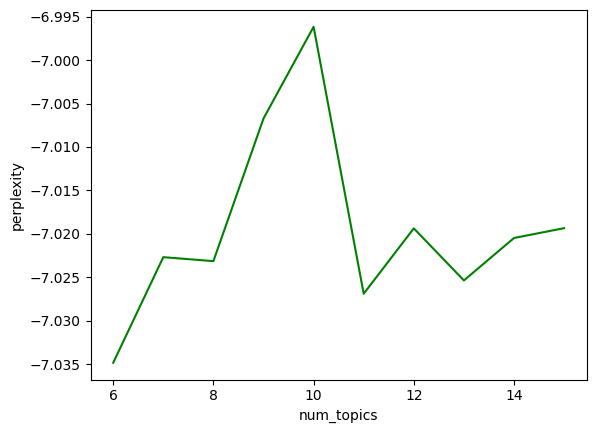

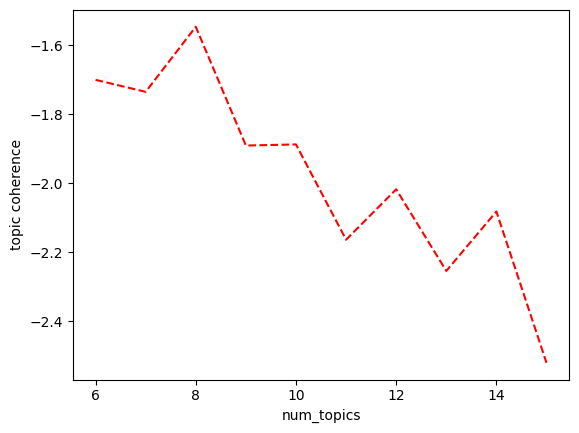

In [28]:
def show_coherence(corpus, dictionary, start = 6, end = 15):
    iter_num = [] #topic의 수
    per_value = [] #혼란도
    coh_value = [] #토픽 응집도

    for i in range(start, end + 1):
        model = LdaModel(corpus = corpus, id2word = dictionary,
                         chunksize = 1000, num_topics=i,
                         random_state = 7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model = model, corpus = corpus, coherence = 'u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f"num_topics = {i}, perplexity = {pv:0.3f}, coherence = {cv:0.3f}")

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity") #작을 수록 좋음
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("topic coherence") #ㄷ클 수록 좋음
    plt.show()

show_coherence(corpus, dictionary, start = 6, end = 15) #분석가가 가장 좋은 topic의 수 결정

### 토픽 트렌드로 시간에 따른 주제의 변화 알아내기

모든 문서에 생성 날짜가 있따면, 특정한 기간에 만들어진 문서들의 토픽 분포에 대한 평균을 계산해 그 기나 동안의 토픽 분포를 알아낼 수 있다.
예를 들면, 각 월의 토픽 분포 평균을 계산함으로써, 매달 토픽이 어떻게 변화했는지 확인한다.

In [29]:
import pandas as pd

df = pd.read_csv("C:/Users/ahyeo/OneDrive/문서/바탕 화면/Project2024/TextMining/Chapter02/petition_sampled.csv")
df.iloc[[2]] #content와 start 사용

,article_id,start,end,answered,votes,category,title,content
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
twit = Okt()

def tokenizer(doc) :
    return [token for token in twit.nouns(doc) if len(token) > 1]

vec = CountVectorizer(tokenizer = tokenizer,
                      max_df = 0.5, min_df = 5,
                      max_features = 1000)

pet_cv = vec.fit_transform(df.content)
print(pet_cv.shape)

C:\Users\ahyeo\anaconda3\envs\TextMining\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(18077, 1000)


In [36]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 15, \
                                n_jobs= -1, \
                                random_state=0)

%time pet_topics = lda.fit_transform(pet_cv)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i]
                         for i in topic.argsort()[:-n_top_words - 1:-1]]))
print_top_words(lda,vec.get_feature_names_out(), 10)

CPU times: total: 1.36 s
Wall time: 23.7 s
Topic #0: 사람, 생각, 피해자, 병원, 사건, 정말, 가족, 대통령, 자신, 환자
Topic #1: 북한, 한국, 우리, 대통령, 정부, 미국, 대한민국, 일본, 문재인, 국가
Topic #2: 아이, 부모, 생각, 어린이집, 교사, 엄마, 우리, 유치원, 자녀, 가정
Topic #3: 청소년, 불법, 폐지, 보호, 장애인, 조직, 사찰, 생각, 이용, 외국인
Topic #4: 정부, 주택, 정책, 부동산, 서민, 국민, 아파트, 나라, 대통령, 지금
Topic #5: 일자리, 기업, 근무, 정부, 생각, 지원, 근로자, 임금, 최저임금, 정책
Topic #6: 국민, 청원, 국회의원, 대통령, 국회, 난민, 의원, 정치, 대한민국, 생각
Topic #7: 대한, 관리, 내용, 조사, 관련, 판결, 업무, 공사, 사실, 판사
Topic #8: 학생, 학교, 교육, 선수, 시험, 생각, 대학, 공부, 선생님, 교사
Topic #9: 보험, 연금, 국민연금, 공무원, 건강, 의료, 지급, 방송, 국민, 소득
Topic #10: 여성, 공무원, 사회, 생각, 남성, 의무, 남자, 대한민국, 여자, 사람
Topic #11: 경찰, 범죄, 국민, 사건, 위해, 조직, 대한민국, 불법, 만행, 수사
Topic #12: 처벌, 차량, 사건, 사고, 피해자, 범죄, 경우, 피해, 대한, 기사
Topic #13: 민원, 화폐, 가상, 정부, 투자, 거래, 시장, 계획, 규제, 주식
Topic #14: 사람, 회사, 지역, 저희, 대출, 생각, 사용, 미세먼지, 판매, 문제


In [38]:
## 데이터 날짜와 내용을 통한 토픽 트렌드 계산 (연도와 월)

from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

trend_data = pd.DataFrame(pet_topics, columns = ['Topic'+str(i) for i in range(1, 16)])
trend_data = pd.concat([trend_data, df.start.map(lambda x:x[:7])], axis = 1) #주제-연도-월 을 합침
trend_data.iloc[:5, -5:]

,Topic12,Topic13,Topic14,Topic15,start
0,0.000307,0.000307,0.000307,0.000307,2017-08
1,0.000813,0.000813,0.000813,0.425031,2017-08
2,0.001449,0.001449,0.001449,0.001449,2017-08
3,0.000227,0.000227,0.000227,0.000227,2017-08
4,0.000447,0.044870,0.000447,0.000447,2017-08


In [39]:
trend = trend_data.groupby(['start']).mean()
trend.iloc[:5, -5:]

,Topic11,Topic12,Topic13,Topic14,Topic15
start,,,,,
2017-08,0.028187,0.018142,0.023323,0.022292,0.102061
2017-09,0.042437,0.023987,0.097511,0.018154,0.042309
2017-10,0.088276,0.054098,0.064813,0.029914,0.096482
2017-11,0.044859,0.043676,0.229894,0.039596,0.046768
2017-12,0.056061,0.028838,0.074279,0.046931,0.077424


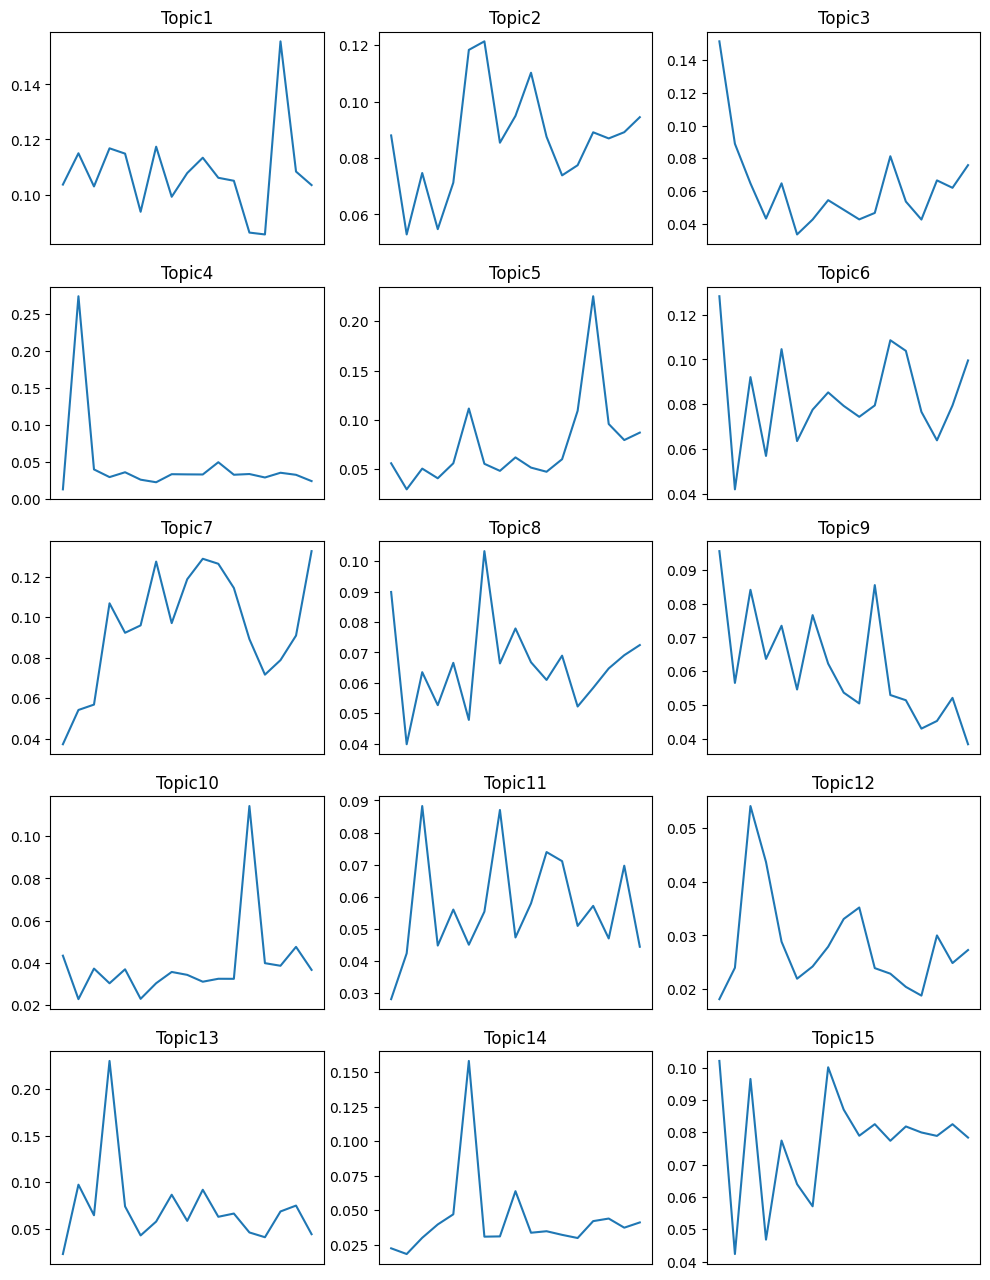

In [42]:
import matplotlib.pyplot
import matplotlib
%matplotlib inline

fig, axes = plt.subplots(5, 3, sharex = 'col', figsize = (12, 16))
for col, ax in zip(trend.columns.tolist(), axes.ravel()):
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show()

#### 동적 토핑 모델링

다음 시간 단위에서 추출되는 토픽이 이전 시간 단위의 토픽과 유사하다고 가정하고, 최대한 이전 토픽을 반영하여 다음 시간의 토픽을 추출하는 것
어떤 시점 t에서의 alpha, beta가 이전 시점인 t-1에서의 alpha, beta에 의해 결정된다.


In [43]:
df

,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...
...,...,...,...,...,...,...,...,...
18072,468520,2018-12-13,2019-01-12,0,9,정치개혁,자유당 의원정수 200명으로 줄이자,http://m.hani.co.kr/arti/politics/assembly/868...
18073,468529,2018-12-13,2019-01-12,0,48,외교/통일/국방,김정은 우상 숭배 단체 모두 처벌 청원...,솔직히 김정은이 남한에 온다고 특별히 달라지는 건 없지만...\n기약 없는 김정은의...
18074,468582,2018-12-13,2019-01-12,0,36,외교/통일/국방,외국인 배우자 초청 비자 불허한 영사 직권남용 규탄,주우즈베키스탄 담당 한국인 영사 정길수에게 여러 차례 전화를 시도를 하여도 연결이 ...
18075,468598,2018-12-13,2019-01-12,0,18,외교/통일/국방,남북통일 이루는것 보다 (박근혜.이명박) 전 대통령님 두 분 석방 통일을 시키는 것...,존경하는 문재인 대통령님\n남북통일을 빠르게 이루는 것 보다\n박근혜 전 대통령님과...


In [45]:
df_sorted = df.sort_values(by='start') # 문서를 시작날짜 순으로 정렬

# time slice를 생성. 월별로 변화를 보기 위해 연도와 월만 추출하여 time 열 생성
df_sorted['time'] = df_sorted['start'].map(lambda x: x[:7])

# 각 월별로 문서가 몇건인지를 계산하여 time_slice에 저장
time_slice = list(df_sorted['time'].value_counts().sort_index())
print(time_slice, sum(time_slice))

[83, 906, 298, 1446, 926, 1514, 1304, 1097, 1217, 1301, 1246, 1291, 1390, 1155, 1277, 1187, 439] 18077


In [47]:
df_sorted['time'].value_counts().sort_index()

time
2017-08      83
2017-09     906
2017-10     298
2017-11    1446
2017-12     926
2018-01    1514
2018-02    1304
2018-03    1097
2018-04    1217
2018-05    1301
2018-06    1246
2018-07    1291
2018-08    1390
2018-09    1155
2018-10    1277
2018-11    1187
2018-12     439
Name: count, dtype: int64

In [49]:
time_tag = sorted(list(set(df_sorted['time'])))
print(time_tag)

['2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12']


In [50]:
#토큰화, gensim을 사용한 dictionary, corpus 생성
from gensim.corpora.dictionary import Dictionary
from konlpy.tag import Okt
twit = Okt()

def tokeninzer(doc):
    return [token for token in twit.nouns(doc) if len(token) > 1]

texts = [tokenizer(news) for news in df_sorted['content']]

dictionary = Dictionary(texts)
print("#Number of initial unique words in documnets : ", len(dictionary))

dictionary.filter_extremes(keep_n = 2000, no_below = 5, no_above = 0.5)
print("#Number of unique words after removing rare and common words : ", len(dictionary))

corpus = [dictionary.doc2bow(text) for text in texts]
print("#Number of unique tokens : %d" % len(dictionary))
print("#Number of documents : %d" % len(corpus))

#Number of initial unique words in documnets :  36344
#Number of unique words after removing rare and common words :  2000
#Number of unique tokens : 2000
#Number of documents : 18077


-1.7493528544065975
num_topics = 6, perplexity = -6.903, coherence = -2.204
num_topics = 7, perplexity = -6.885, coherence = -2.174
num_topics = 8, perplexity = -6.886, coherence = -2.181
num_topics = 9, perplexity = -6.875, coherence = -2.323
num_topics = 10, perplexity = -6.860, coherence = -2.298
num_topics = 11, perplexity = -6.863, coherence = -2.355
num_topics = 12, perplexity = -6.864, coherence = -2.616
num_topics = 13, perplexity = -6.872, coherence = -2.333
num_topics = 14, perplexity = -6.884, coherence = -2.439
num_topics = 15, perplexity = -6.946, coherence = -2.452


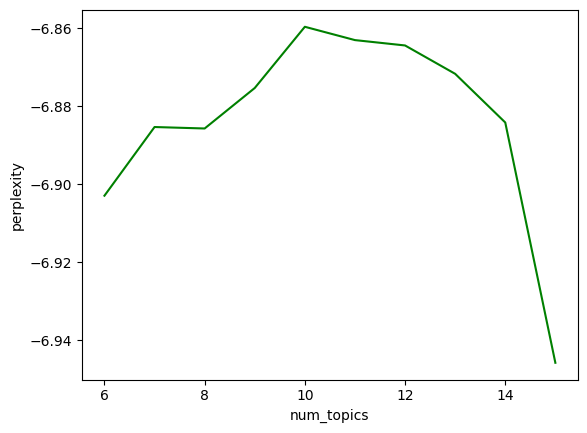

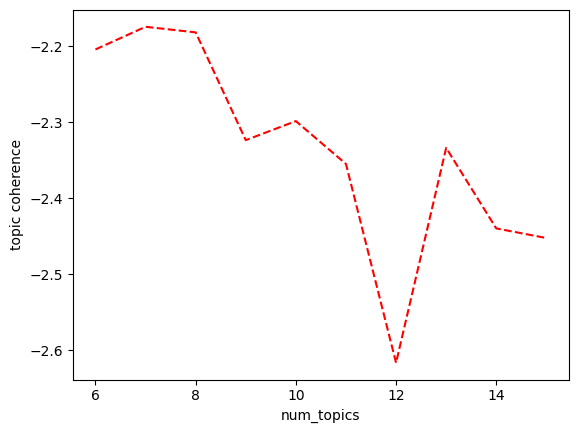

In [51]:
### 토픽 응집도 및 혼란도를 통한 topic 최적화
from gensim.models import CoherenceModel

coherence = cm.get_coherence()
print(coherence)
show_coherence(corpus, dictionary, start = 6, end = 15)

In [52]:
###LdaSeqModel 실행 (동적 트렌드 분석)
from gensim.models import LdaSeqModel
import warnings
warnings.filterwarnings("ignore")

ldaseq = LdaSeqModel(corpus = corpus, id2word = dictionary, time_slice = time_slice, num_topics = 6, random_state=7)


KeyboardInterrupt



In [ ]:
#토픽 결과로부터 상위 n개의 단어만 반환
def get_topic_words(topic, top_n_words = 10):
    words, _ = zip(*topic)
    return words[:top_n_words]

#주어진 토픽에 대해 시간별로 상위단어를 간략하게 출력
def print_topic_times(model, topic, time_tag, top_n_words = 10):
    topic_times = model.print_topic_times(topic)
    for i in range(len(topic_times)):
        print(time_tag[i]+':', get_topic_words(topic_times[i], top_n_words))

In [ ]:
print_topic_times(ldaseq, 4, time_tag, 8) #4번째 토픽에 대한 상위 8개의 단어 출력

In [ ]:
#구간별로 문서 토픽 분포의 평균을 구해 토픽의 트렌드로 사용
def get_topic_trends(model, corpus, time_slice):
    dtm = model.dtm_vis(0, corpus) #문서별 토픽 분포를 가져온다.
    result = []
    start = 0
    for index in time_slice: #각 구간별 문서들에 대한 토픽 분포 평균을 구한다.
        result.append(np.array(dtm[0][start:start+index]).mean(axis = 0))
        start += index
    return np.array(result)

topic_trends = get_topic_trends(ldaseq, corpus, time_slice)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

topic_titles = ['Topic ' + str(i) for i in range(6)]
fig, axes = plt.subplots(2, 4, sharex = 'col', figsize = (12, 6))
for i, (title, ax) in enumerate(zip(topic_titles, axes.ravel())):
    ax.set_title(title)
    ax.set_xticks([0, 5, 10, 15])
    ax.set_xticklabels(time_tag[::5])
    ax.plot(topic_trends[:, i])

plt.savefig('dtm.png')
plt.show()

####  시각화

시각화 결과가 인터렉티브하게 구현되어 있고 해당 토픽의 구성을 수평막대그래프로 확인하고 싶으면, pyLDAvis 라이브러리를 사용한다!!